In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tool-wear-detection-in-cnc-mill/experiment_07.csv
/kaggle/input/tool-wear-detection-in-cnc-mill/experiment_02.csv
/kaggle/input/tool-wear-detection-in-cnc-mill/experiment_05.csv
/kaggle/input/tool-wear-detection-in-cnc-mill/experiment_17.csv
/kaggle/input/tool-wear-detection-in-cnc-mill/experiment_14.csv
/kaggle/input/tool-wear-detection-in-cnc-mill/experiment_13.csv
/kaggle/input/tool-wear-detection-in-cnc-mill/experiment_11.csv
/kaggle/input/tool-wear-detection-in-cnc-mill/experiment_04.csv
/kaggle/input/tool-wear-detection-in-cnc-mill/README.txt
/kaggle/input/tool-wear-detection-in-cnc-mill/experiment_08.csv
/kaggle/input/tool-wear-detection-in-cnc-mill/experiment_09.csv
/kaggle/input/tool-wear-detection-in-cnc-mill/experiment_16.csv
/kaggle/input/tool-wear-detection-in-cnc-mill/experiment_10.csv
/kaggle/input/tool-wear-detection-in-cnc-mill/experiment_03.csv
/kaggle/input/tool-wear-detection-in-cnc-mill/train.csv
/kaggle/input/tool-wear-detection-in-cnc-mill/experimen

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import pickle
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Dropout,Input
from tensorflow.keras.models import Model


2026-01-08 11:13:47.328350: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1767870827.515204      17 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1767870827.571673      17 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1767870828.021934      17 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1767870828.022000      17 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1767870828.022003      17 computation_placer.cc:177] computation placer alr

In [3]:

#/kaggle/input/tool-wear-detection-in-cnc-mill

path = "/kaggle/input/tool-wear-detection-in-cnc-mill/"


files = sorted(glob.glob(path + "experiment_*.csv"))

print(files) 


dfs = []
for file in files:
    df = pd.read_csv(file)

   
    exp_no = file.split("_")[-1].split(".")[0]
    df["experiment_no"] = int(exp_no)

    dfs.append(df)

merged_df = pd.concat(dfs, ignore_index=True)

merged_df.head()
merged_df.shape


['/kaggle/input/tool-wear-detection-in-cnc-mill/experiment_01.csv', '/kaggle/input/tool-wear-detection-in-cnc-mill/experiment_02.csv', '/kaggle/input/tool-wear-detection-in-cnc-mill/experiment_03.csv', '/kaggle/input/tool-wear-detection-in-cnc-mill/experiment_04.csv', '/kaggle/input/tool-wear-detection-in-cnc-mill/experiment_05.csv', '/kaggle/input/tool-wear-detection-in-cnc-mill/experiment_06.csv', '/kaggle/input/tool-wear-detection-in-cnc-mill/experiment_07.csv', '/kaggle/input/tool-wear-detection-in-cnc-mill/experiment_08.csv', '/kaggle/input/tool-wear-detection-in-cnc-mill/experiment_09.csv', '/kaggle/input/tool-wear-detection-in-cnc-mill/experiment_10.csv', '/kaggle/input/tool-wear-detection-in-cnc-mill/experiment_11.csv', '/kaggle/input/tool-wear-detection-in-cnc-mill/experiment_12.csv', '/kaggle/input/tool-wear-detection-in-cnc-mill/experiment_13.csv', '/kaggle/input/tool-wear-detection-in-cnc-mill/experiment_14.csv', '/kaggle/input/tool-wear-detection-in-cnc-mill/experiment_15.

(25286, 49)

In [4]:
merged_df.describe()


,X1_ActualPosition,X1_ActualVelocity,X1_ActualAcceleration,X1_CommandPosition,X1_CommandVelocity,X1_CommandAcceleration,X1_CurrentFeedback,X1_DCBusVoltage,X1_OutputCurrent,X1_OutputVoltage,...,S1_CurrentFeedback,S1_DCBusVoltage,S1_OutputCurrent,S1_OutputVoltage,S1_OutputPower,S1_SystemInertia,M1_CURRENT_PROGRAM_NUMBER,M1_sequence_number,M1_CURRENT_FEEDRATE,experiment_no
count,25286.000000,25286.000000,25286.000000,25286.000000,25286.000000,25286.000000,25286.000000,2.528600e+04,25286.000000,25286.000000,...,25286.000000,2.528600e+04,25286.000000,25286.000000,25286.000000,25286.0,25286.000000,25286.000000,25286.000000,25286.000000
mean,159.052045,-0.288657,0.094264,159.050700,-0.283076,0.253215,-0.469714,6.603073e-02,326.945859,7.986942,...,15.243948,6.692938e-01,322.784505,85.479195,0.127405,12.0,1.003441,47.345013,16.542039,10.738235
std,19.330873,5.658260,93.877623,19.331144,5.664309,72.594951,4.220750,3.700384e-02,1.459937,7.710379,...,10.222419,4.332413e-01,4.293571,52.531863,0.080753,0.0,0.349055,43.826214,19.620219,5.213285
min,141.000000,-20.400000,-1280.000000,141.000000,-20.000000,-1000.000000,-23.400000,2.780000e-19,320.000000,0.000000,...,-8.280000,0.000000e+00,290.000000,0.000000,-0.002960,12.0,0.000000,0.000000,3.000000,1.000000
25%,145.000000,-2.050000,-31.300000,145.000000,-2.050000,0.000000,-3.930000,4.150000e-02,326.000000,2.590000,...,0.821000,2.790000e-19,320.000000,0.000000,0.000005,12.0,1.000000,2.000000,3.000000,6.000000
50%,153.000000,0.000000,0.000000,153.000000,0.000000,0.000000,-0.666000,6.680000e-02,327.000000,7.140000,...,18.800000,8.580000e-01,322.000000,117.000000,0.164000,12.0,1.000000,39.000000,6.000000,12.000000
75%,162.000000,0.200000,25.000000,162.000000,0.000000,0.000000,3.140000,9.130000e-02,327.000000,10.200000,...,22.300000,9.520000e-01,327.000000,119.000000,0.183000,12.0,1.000000,85.000000,20.000000,15.000000
max,198.000000,50.700000,1440.000000,198.000000,50.000000,1000.000000,27.100000,3.800000e-01,331.000000,75.400000,...,75.400000,3.160000e+00,332.000000,130.000000,0.569000,12.0,4.000000,135.000000,50.000000,18.000000


In [5]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25286 entries, 0 to 25285
Data columns (total 49 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   X1_ActualPosition          25286 non-null  float64
 1   X1_ActualVelocity          25286 non-null  float64
 2   X1_ActualAcceleration      25286 non-null  float64
 3   X1_CommandPosition         25286 non-null  float64
 4   X1_CommandVelocity         25286 non-null  float64
 5   X1_CommandAcceleration     25286 non-null  float64
 6   X1_CurrentFeedback         25286 non-null  float64
 7   X1_DCBusVoltage            25286 non-null  float64
 8   X1_OutputCurrent           25286 non-null  float64
 9   X1_OutputVoltage           25286 non-null  float64
 10  X1_OutputPower             25286 non-null  float64
 11  Y1_ActualPosition          25286 non-null  float64
 12  Y1_ActualVelocity          25286 non-null  float64
 13  Y1_ActualAcceleration      25286 non-null  flo

In [6]:
df = pd.read_csv('/kaggle/input/tool-wear-detection-in-cnc-mill/train.csv')
df.head()

,No,material,feedrate,clamp_pressure,tool_condition,machining_finalized,passed_visual_inspection
0,1,wax,6,4.0,unworn,yes,yes
1,2,wax,20,4.0,unworn,yes,yes
2,3,wax,6,3.0,unworn,yes,yes
3,4,wax,6,2.5,unworn,no,NaN
4,5,wax,20,3.0,unworn,no,NaN


In [7]:
df.shape

(18, 7)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   No                        18 non-null     int64  
 1   material                  18 non-null     object 
 2   feedrate                  18 non-null     int64  
 3   clamp_pressure            18 non-null     float64
 4   tool_condition            18 non-null     object 
 5   machining_finalized       18 non-null     object 
 6   passed_visual_inspection  14 non-null     object 
dtypes: float64(1), int64(2), object(4)
memory usage: 1.1+ KB


In [9]:
df.fillna('no', inplace= True)

In [10]:
df['No'] = df['No'].astype(int)


In [11]:
print("merged_df columns:\n", merged_df.columns)
print("\ndf (main.csv) columns:\n", df.columns)


merged_df columns:
 Index(['X1_ActualPosition', 'X1_ActualVelocity', 'X1_ActualAcceleration',
       'X1_CommandPosition', 'X1_CommandVelocity', 'X1_CommandAcceleration',
       'X1_CurrentFeedback', 'X1_DCBusVoltage', 'X1_OutputCurrent',
       'X1_OutputVoltage', 'X1_OutputPower', 'Y1_ActualPosition',
       'Y1_ActualVelocity', 'Y1_ActualAcceleration', 'Y1_CommandPosition',
       'Y1_CommandVelocity', 'Y1_CommandAcceleration', 'Y1_CurrentFeedback',
       'Y1_DCBusVoltage', 'Y1_OutputCurrent', 'Y1_OutputVoltage',
       'Y1_OutputPower', 'Z1_ActualPosition', 'Z1_ActualVelocity',
       'Z1_ActualAcceleration', 'Z1_CommandPosition', 'Z1_CommandVelocity',
       'Z1_CommandAcceleration', 'Z1_CurrentFeedback', 'Z1_DCBusVoltage',
       'Z1_OutputCurrent', 'Z1_OutputVoltage', 'S1_ActualPosition',
       'S1_ActualVelocity', 'S1_ActualAcceleration', 'S1_CommandPosition',
       'S1_CommandVelocity', 'S1_CommandAcceleration', 'S1_CurrentFeedback',
       'S1_DCBusVoltage', 'S1_OutputCurr

In [12]:

merged_df['experiment_no'] = merged_df['experiment_no'].astype(int)


In [13]:
df = df.rename(columns={'No': 'experiment_no'})
df['experiment_no'] = df['experiment_no'].astype(int)


In [14]:
final_df = pd.merge(
    merged_df,
    df,
    on='experiment_no',
    how='left'
)


In [15]:
print("Final shape:", final_df.shape)
final_df.head()


Final shape: (25286, 55)


,X1_ActualPosition,X1_ActualVelocity,X1_ActualAcceleration,X1_CommandPosition,X1_CommandVelocity,X1_CommandAcceleration,X1_CurrentFeedback,X1_DCBusVoltage,X1_OutputCurrent,X1_OutputVoltage,...,M1_sequence_number,M1_CURRENT_FEEDRATE,Machining_Process,experiment_no,material,feedrate,clamp_pressure,tool_condition,machining_finalized,passed_visual_inspection
0,198.0,0.0,0.00,198.0,0.0,0.000000,0.18,0.0207,329.0,2.77,...,0.0,50.0,Starting,1,wax,6,4.0,unworn,yes,yes
1,198.0,-10.8,-350.00,198.0,-13.6,-358.000000,-10.90,0.1860,328.0,23.30,...,4.0,50.0,Prep,1,wax,6,4.0,unworn,yes,yes
2,196.0,-17.8,-6.25,196.0,-17.9,-0.000095,-8.59,0.1400,328.0,30.60,...,7.0,50.0,Prep,1,wax,6,4.0,unworn,yes,yes
3,194.0,-18.0,0.00,194.0,-17.9,-0.000095,-6.11,0.1300,327.0,30.30,...,7.0,50.0,Prep,1,wax,6,4.0,unworn,yes,yes
4,193.0,-17.9,-18.80,192.0,-17.9,0.000095,-5.70,0.1140,328.0,30.50,...,7.0,50.0,Prep,1,wax,6,4.0,unworn,yes,yes


In [16]:
final_df.describe()

,X1_ActualPosition,X1_ActualVelocity,X1_ActualAcceleration,X1_CommandPosition,X1_CommandVelocity,X1_CommandAcceleration,X1_CurrentFeedback,X1_DCBusVoltage,X1_OutputCurrent,X1_OutputVoltage,...,S1_OutputCurrent,S1_OutputVoltage,S1_OutputPower,S1_SystemInertia,M1_CURRENT_PROGRAM_NUMBER,M1_sequence_number,M1_CURRENT_FEEDRATE,experiment_no,feedrate,clamp_pressure
count,25286.000000,25286.000000,25286.000000,25286.000000,25286.000000,25286.000000,25286.000000,2.528600e+04,25286.000000,25286.000000,...,25286.000000,25286.000000,25286.000000,25286.0,25286.000000,25286.000000,25286.000000,25286.000000,25286.000000,25286.000000
mean,159.052045,-0.288657,0.094264,159.050700,-0.283076,0.253215,-0.469714,6.603073e-02,326.945859,7.986942,...,322.784505,85.479195,0.127405,12.0,1.003441,47.345013,16.542039,10.738235,7.123942,3.368168
std,19.330873,5.658260,93.877623,19.331144,5.664309,72.594951,4.220750,3.700384e-02,1.459937,7.710379,...,4.293571,52.531863,0.080753,0.0,0.349055,43.826214,19.620219,5.213285,6.167036,0.615639
min,141.000000,-20.400000,-1280.000000,141.000000,-20.000000,-1000.000000,-23.400000,2.780000e-19,320.000000,0.000000,...,290.000000,0.000000,-0.002960,12.0,0.000000,0.000000,3.000000,1.000000,3.000000,2.500000
25%,145.000000,-2.050000,-31.300000,145.000000,-2.050000,0.000000,-3.930000,4.150000e-02,326.000000,2.590000,...,320.000000,0.000000,0.000005,12.0,1.000000,2.000000,3.000000,6.000000,3.000000,3.000000
50%,153.000000,0.000000,0.000000,153.000000,0.000000,0.000000,-0.666000,6.680000e-02,327.000000,7.140000,...,322.000000,117.000000,0.164000,12.0,1.000000,39.000000,6.000000,12.000000,3.000000,3.000000
75%,162.000000,0.200000,25.000000,162.000000,0.000000,0.000000,3.140000,9.130000e-02,327.000000,10.200000,...,327.000000,119.000000,0.183000,12.0,1.000000,85.000000,20.000000,15.000000,6.000000,4.000000
max,198.000000,50.700000,1440.000000,198.000000,50.000000,1000.000000,27.100000,3.800000e-01,331.000000,75.400000,...,332.000000,130.000000,0.569000,12.0,4.000000,135.000000,50.000000,18.000000,20.000000,4.000000


In [17]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25286 entries, 0 to 25285
Data columns (total 55 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   X1_ActualPosition          25286 non-null  float64
 1   X1_ActualVelocity          25286 non-null  float64
 2   X1_ActualAcceleration      25286 non-null  float64
 3   X1_CommandPosition         25286 non-null  float64
 4   X1_CommandVelocity         25286 non-null  float64
 5   X1_CommandAcceleration     25286 non-null  float64
 6   X1_CurrentFeedback         25286 non-null  float64
 7   X1_DCBusVoltage            25286 non-null  float64
 8   X1_OutputCurrent           25286 non-null  float64
 9   X1_OutputVoltage           25286 non-null  float64
 10  X1_OutputPower             25286 non-null  float64
 11  Y1_ActualPosition          25286 non-null  float64
 12  Y1_ActualVelocity          25286 non-null  float64
 13  Y1_ActualAcceleration      25286 non-null  flo

In [18]:
category=['tool_condition', 'machining_finalized', 'passed_visual_inspection']
continuous=['X1_ActualPosition', 'X1_ActualVelocity', 'X1_ActualAcceleration',
       'X1_CommandPosition', 'X1_CommandVelocity', 'X1_CommandAcceleration',
       'X1_CurrentFeedback', 'X1_DCBusVoltage', 'X1_OutputCurrent',
       'X1_OutputVoltage', 'X1_OutputPower', 'Y1_ActualPosition',
       'Y1_ActualVelocity', 'Y1_ActualAcceleration', 'Y1_CommandPosition',
       'Y1_CommandVelocity', 'Y1_CommandAcceleration', 'Y1_CurrentFeedback',
       'Y1_DCBusVoltage', 'Y1_OutputCurrent', 'Y1_OutputVoltage',
       'Y1_OutputPower', 'Z1_ActualPosition', 'Z1_ActualVelocity',
       'Z1_ActualAcceleration', 'Z1_CommandPosition', 'Z1_CommandVelocity',
       'Z1_CommandAcceleration', 'Z1_CurrentFeedback', 'Z1_DCBusVoltage',
       'Z1_OutputCurrent', 'Z1_OutputVoltage', 'S1_ActualPosition',
       'S1_ActualVelocity', 'S1_ActualAcceleration', 'S1_CommandPosition',
       'S1_CommandVelocity', 'S1_CommandAcceleration', 'S1_CurrentFeedback',
       'S1_DCBusVoltage', 'S1_OutputCurrent', 'S1_OutputVoltage',
       'S1_OutputPower', 'S1_SystemInertia', 'M1_CURRENT_PROGRAM_NUMBER',
       'M1_sequence_number', 'M1_CURRENT_FEEDRATE', 'Machining_Process']

In [19]:
final_df.head()

,X1_ActualPosition,X1_ActualVelocity,X1_ActualAcceleration,X1_CommandPosition,X1_CommandVelocity,X1_CommandAcceleration,X1_CurrentFeedback,X1_DCBusVoltage,X1_OutputCurrent,X1_OutputVoltage,...,M1_sequence_number,M1_CURRENT_FEEDRATE,Machining_Process,experiment_no,material,feedrate,clamp_pressure,tool_condition,machining_finalized,passed_visual_inspection
0,198.0,0.0,0.00,198.0,0.0,0.000000,0.18,0.0207,329.0,2.77,...,0.0,50.0,Starting,1,wax,6,4.0,unworn,yes,yes
1,198.0,-10.8,-350.00,198.0,-13.6,-358.000000,-10.90,0.1860,328.0,23.30,...,4.0,50.0,Prep,1,wax,6,4.0,unworn,yes,yes
2,196.0,-17.8,-6.25,196.0,-17.9,-0.000095,-8.59,0.1400,328.0,30.60,...,7.0,50.0,Prep,1,wax,6,4.0,unworn,yes,yes
3,194.0,-18.0,0.00,194.0,-17.9,-0.000095,-6.11,0.1300,327.0,30.30,...,7.0,50.0,Prep,1,wax,6,4.0,unworn,yes,yes
4,193.0,-17.9,-18.80,192.0,-17.9,0.000095,-5.70,0.1140,328.0,30.50,...,7.0,50.0,Prep,1,wax,6,4.0,unworn,yes,yes


In [20]:
final_df.shape

(25286, 55)

In [21]:
encoder={}

cat_col = ['tool_condition' , 'machining_finalized' ,'passed_visual_inspection' ]

for col in cat_col :
    le = LabelEncoder()
    final_df[col] = le.fit_transform(final_df[col])
    encoder[col]=le

In [22]:
non_numeric = final_df.select_dtypes(include=['object']).columns
final_df=final_df.drop(columns=non_numeric)

In [23]:
x = final_df.drop(columns=cat_col)
y=final_df['tool_condition']

In [24]:
s = StandardScaler()
x_s = s.fit_transform(x)

x_new = x_s.reshape((x_s.shape[0],1,x_s.shape[1]))

In [25]:
x_train , x_test , y_train , y_test = train_test_split(x_new,y,test_size=0.2,random_state=42)

In [26]:
in_shape = (x_train.shape[1] , x_train.shape[2])

inp = Input(shape=in_shape)

lstm1 = LSTM(50, return_sequences=True)(inp)
dropout1 = Dropout(0.2)(lstm1)
lstm2 = LSTM(50, return_sequences=False)(dropout1)
dropout2 = Dropout(0.2)(lstm2)

dense = Dense(50, activation='relu')(dropout2)

output = Dense(
    len(encoder['tool_condition'].classes_),
    activation='softmax',
    name='tool_condition'
)(dense)

model = Model(inputs=inp , outputs=output)

2026-01-08 11:14:03.350502: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [27]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

y_train_tool = y_train.values.ravel()
y_test_tool = y_test.values.ravel()

history = model.fit(
    x_train,
    y_train_tool,
    epochs=20,
    batch_size=32,
    validation_data=(x_test, y_test_tool),
    verbose=1
)


Epoch 1/20
633/633 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7135 - loss: 0.5094 - val_accuracy: 0.8836 - val_loss: 0.2584
Epoch 2/20
633/633 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8902 - loss: 0.2533 - val_accuracy: 0.9698 - val_loss: 0.1221
Epoch 3/20
633/633 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9431 - loss: 0.1455 - val_accuracy: 0.9575 - val_loss: 0.1095
Epoch 4/20
633/633 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9654 - loss: 0.0943 - val_accuracy: 0.9836 - val_loss: 0.0464
Epoch 5/20
633/633 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9824 - loss: 0.0553 - val_accuracy: 0.9893 - val_loss: 0.0343
Epoch 6/20
633/633 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9863 - loss: 0.0406 - val_accuracy: 0.9945 - val_loss: 0.0213
Epoch 7/20
633/633 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9895 - loss: 0.0339 - val_accuracy: 0.9937 - val_loss: 0.0209
Epoch 8/20
633/633 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9911 - loss: 0.0270 - val_accuracy: 0.

In [28]:
test_loss, test_accuracy = model.evaluate(
    x_test,
    y_test_tool,
    verbose=1
)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9976 - loss: 0.0069
Test Loss: 0.007866236381232738
Test Accuracy: 0.9966390132904053


In [29]:
print("Train accuracy:", history.history['accuracy'][-1])
print("Validation accuracy:", history.history['val_accuracy'][-1])


Train accuracy: 0.9967371821403503
Validation accuracy: 0.9966390132904053


In [30]:
print("Train loss:", history.history['loss'][-1])
print("Validation loss:", history.history['val_loss'][-1])


Train loss: 0.00908341072499752
Validation loss: 0.007866236381232738


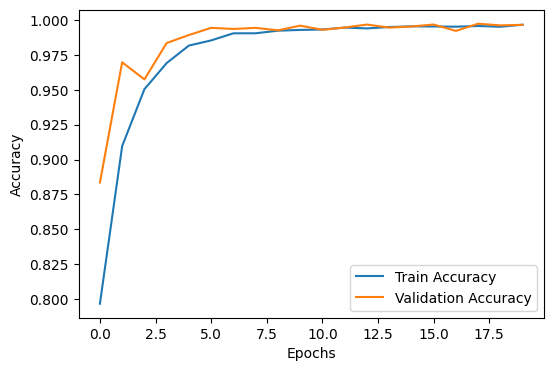

In [31]:


plt.figure(figsize=(6,4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [32]:
test_loss, test_accuracy = model.evaluate(x_test, y_test_tool)
train_loss , train_accuracy = model.evaluate(x_train,y_train_tool)
print("Test accuracy:", test_accuracy)
print("Train accuracy:", train_accuracy)



159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9976 - loss: 0.0069
633/633 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9984 - loss: 0.0037
Test accuracy: 0.9966390132904053
Train accuracy: 0.9985663294792175
